In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
#光变曲线

# 提取数据长度
data = pd.read_csv("0.3_10_final.csv")  
counts_data = data['RATE']
dt=200
mean_x_data = np.mean(counts_data)

N=len(counts_data)
N_randomlc=len(counts_data)

omega = []
POW = []
DFT = []
fr = []
fi = []
f1 = []
f2 = []
p = []
f = []


counts_list=[None for i in range(500)]

# 500条光变曲线
for a in range(500):
    f_b=1.7E-4
    alpha_H=3.8
    alpha_L=1.0
    for j in range(1,int(N_randomlc)+1):
        omega.append(j/(N_randomlc*dt))
        POW.append(((omega[-1]**(-alpha_L))/(1+(omega[-1]/f_b)**(alpha_H-alpha_L)))*0.005)
        DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
        s1=np.random.normal(loc=0.0, scale=1.0, size=None)
        s2=np.random.normal(loc=0.0, scale=1.0, size=None)
        fr.append((DFT[-1].real)*s1)
        fi.append((DFT[-1].imag)*s2)
        f1.append(complex(fr[-1],fi[-1]))
    counts = ifft(f1)
    counts_list[a]=counts





'''
pnum = np.arange(len(counts))
t = [i*dt for i in pnum]


plt.figure(figsize=(10,8))
plt.plot(t,counts,'b')
plt.xlabel("time")
plt.ylabel("counts")
plt.title("lightcurve")
plt.show() 
'''

'\npnum = np.arange(len(counts))\nt = [i*dt for i in pnum]\n\n\nplt.figure(figsize=(10,8))\nplt.plot(t,counts,\'b\')\nplt.xlabel("time")\nplt.ylabel("counts")\nplt.title("lightcurve")\nplt.show() \n'

In [3]:

# ????    
# 可以直接在光变曲线上乘上数据光变曲线的平均值，相当于加上泊松噪声    


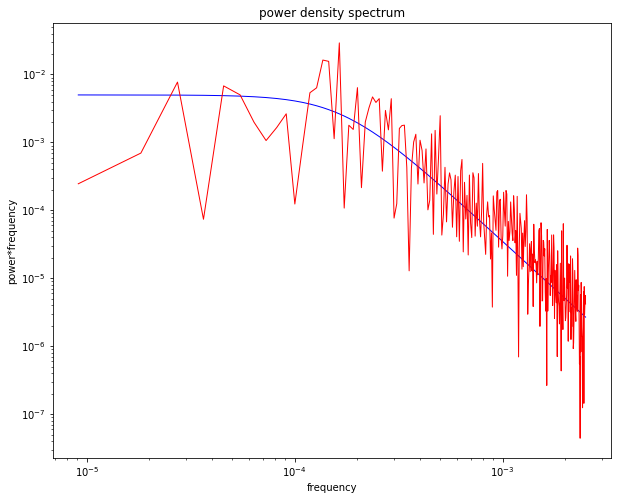

In [4]:
#周期图

per_list=[None for i in range(500)]

for a in range(500):
    nf = N/2
    df = 1/(dt*N)
    F_a = np.arange(1,nf+1)
    F = [i*df for i in F_a]
    F1 = F[0:int(nf)]
    mean_x = np.mean(counts_list[a])
    x_new  = [i-mean_x for i in counts_list[a]]
    dft   = fft(counts_list[a])
    dft_1 = dft[1:int(nf)+1]
    per = (abs(dft_1)**2)

    per_list[a] = per


    
# 500条周期图取 mean,std
per_everypoint_list=[]
for i in range(int(nf)):
    per_everypoint_list.append([])
ADM=[]
ADM_std=[]
for m in range(int(nf)):
    for n in range(500):
        per_everypoint_list[m].append(per_list[n][m])
        
for m in range(int(nf)):
    ADM.append(np.mean(per_everypoint_list[m]))
    ADM_std.append(np.std(per_everypoint_list[m]))    

    
'''
# 生成的光变曲线的均值
mean_list=[]
for a in range(500):
    mean_list.append(np.mean(counts_list[a]))
mean_x_fit=np.mean(mean_list)
'''
    

ADM_times_f = np.multiply(np.array(F),np.array(ADM))
        
        
POW1=POW[0:int(nf)]
P_TIMES_F = np.multiply(np.array(F),np.array(POW1))




plt.figure(figsize=(10,8))
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)
plt.loglog(F1,ADM_times_f,color="r",linewidth=1)    
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.title("power density spectrum")
plt.show()

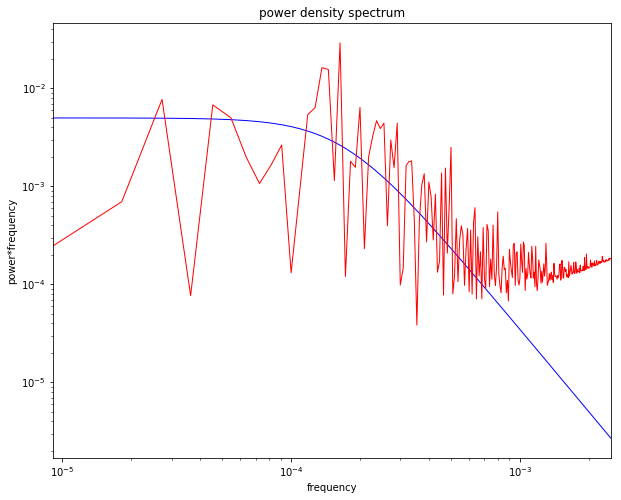

In [5]:
# 加上泊松项？
ADM_with_poisson = [i+2/mean_x_data for i in ADM]


ADM_times_f_ps = np.multiply(np.array(F),np.array(ADM_with_poisson))
        
        
POW1=POW[0:int(nf)]
P_TIMES_F = np.multiply(np.array(F),np.array(POW1))


plt.figure(figsize=(10,8))
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)
plt.loglog(F1,ADM_times_f_ps,color="r",linewidth=1)  
plt.xlim(F[0],F[-1]) 
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.title("power density spectrum")
plt.show()

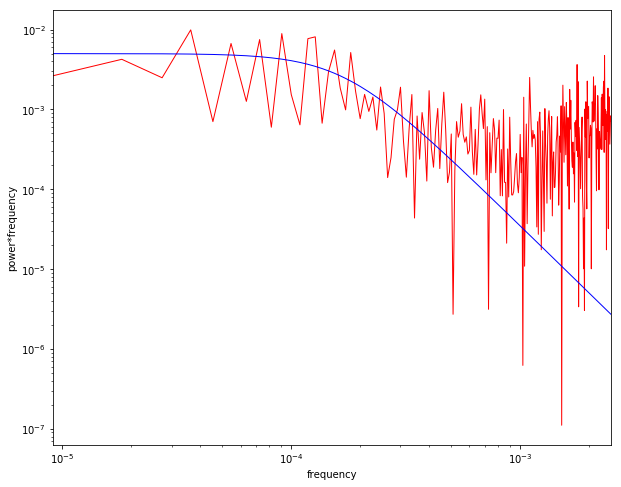

In [6]:
# 从数据得到参考周期图

data = pd.read_csv("0.3_10_final.csv")  

dt=200
counts_data = data['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]

'''
plt.figure(figsize=(10,8))
plt.plot(t,counts_data,'b')
plt.xlabel("TIME(s)")
plt.ylabel("RATE(coount/s)")
plt.title("lightcurve")
plt.show()    
'''

nf = N/2
df = 1/(dt*N)
F_num = np.arange(1,nf)
F = [i*df for i in F_num]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F),np.array(per_data))




f_b=1.7E-4
alpha_H=3.8
alpha_L=1.0
P = [((i**(-alpha_L))/(1+(i/f_b)**(alpha_H-alpha_L)))*0.005 for i in F]

P_TIMES_F = np.multiply(np.array(F),np.array(P))


plt.figure(figsize=(10,8))
plt.loglog(F,p_times_f_data,color="r",linewidth=1) 
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)  
plt.xlim(F[0],F[-1]) 
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.show()

In [7]:
# chi2 =（每一点500平均值 - 每一点数据得到）/ 每一点的500标准差  求和

chi2=0
for i in range(int(nf)-1):
    chi2 = chi2+(((ADM_times_f_ps[i]-p_times_f_data[i])/ADM_std[i])**2)

print (chi2)


7.497791032967978e+28


In [8]:
def chi2_of_model(A):
    data = pd.read_csv("0.3_10_final.csv")  
    counts_data = data['RATE']
    dt=200
    mean_x_data = np.mean(counts_data)
    N=len(counts_data)
    N_randomlc=len(counts_data)
    
    omega = []
    POW = []
    DFT = []
    fr = []
    fi = []
    f1 = []
    f2 = []
    p = []
    f = []
    
    counts_list=[None for i in range(500)]
    
    # 500条光变曲线
    for a in range(500): 
        f_b=1.7E-4
        alpha_H=3.8
        alpha_L=1.0
        for j in range(1,int(N_randomlc)+1):
            omega.append(j/(N_randomlc*dt))
            POW.append(((omega[-1]**(-alpha_L))/(1+(omega[-1]/f_b)**(alpha_H-alpha_L)))*A)
            DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
            s1=np.random.normal(loc=0.0, scale=1.0, size=None)
            s2=np.random.normal(loc=0.0, scale=1.0, size=None)
            fr.append((DFT[-1].real)*s1)
            fi.append((DFT[-1].imag)*s2)
            f1.append(complex(fr[-1],fi[-1]))
        counts = ifft(f1)
        counts_list[a]=counts
    
    #周期图
    per_list=[None for i in range(500)]
    for a in range(500):
        nf = N/2 
        df = 1/(dt*N)
        F_a = np.arange(1,nf+1)
        F = [i*df for i in F_a]
        F1 = F[0:int(nf)]
        mean_x = np.mean(counts_list[a])
        x_new  = [i-mean_x for i in counts_list[a]]
        dft   = fft(counts_list[a])
        dft_1 = dft[1:int(nf)+1]
        per = (abs(dft_1)**2)
        per_list[a] = per
    
    # 500条周期图取 mean,std
    per_everypoint_list=[]
    for i in range(int(nf)):
        per_everypoint_list.append([])
    ADM=[]
    ADM_std=[]
    for m in range(int(nf)):
        for n in range(500):
            per_everypoint_list[m].append(per_list[n][m])
        
    for m in range(int(nf)):
        ADM.append(np.mean(per_everypoint_list[m]))
        ADM_std.append(np.std(per_everypoint_list[m]))    
    

    ADM_times_f = np.multiply(np.array(F),np.array(ADM))
        
        
    POW1=POW[0:int(nf)]
    P_TIMES_F = np.multiply(np.array(F),np.array(POW1))
    
    ADM_with_poisson = [i+2/mean_x_data for i in ADM]
    ADM_times_f_ps = np.multiply(np.array(F),np.array(ADM_with_poisson))
    POW1=POW[0:int(nf)]
    P_TIMES_F = np.multiply(np.array(F),np.array(POW1))
    
    
    pnum = np.arange(len(counts_data))
    t = [i*dt for i in pnum]
    
    nf = N/2
    df = 1/(dt*N)
    F_num = np.arange(1,nf)
    F = [i*df for i in F_num]
    mean_x = np.mean(counts_data)
    dft = fft(counts_data)
    dft1= dft[1:int(nf)]
    per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
    p_times_f = np.multiply(np.array(F),np.array(per_data))
    
    f_b=1.7E-4
    alpha_H=3.8
    alpha_L=1.0
    P = [((i**(-alpha_L))/(1+(i/f_b)**(alpha_H-alpha_L)))*A for i in F]
    P_TIMES_F = np.multiply(np.array(F),np.array(P))
    
    chi2=0
    for i in range(int(nf)-1):
        chi2 = chi2+(((ADM_times_f_ps[i]-p_times_f_data[i])/ADM_std[i])**2)    
    
    
    
    return (chi2)

In [11]:
print(chi2_of_model(0.005))

3.7319153538717144e+28


In [ ]:
print (minimize(chi2_of_model,0.005))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt
